# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Estimating the distribution function


Suppose we don't know what the distribution function (DF) is?  We are not trying to estimate some fixed but unknown parameter $\theta^*$ for some RV we are assuming to be $Bernoulli(\theta^*)$, we are trying to estimate the DF itself.  In real life, data does not come neatly labeled "I am a realisation of a $Bernoulli$ RV", or "I am a realisation of an $Exponential$ RV": an important part of inference and estimation is to make inferences about the DF itself from our observations.   

### Observations from some unknown process
<img src="images/unknownProcessTimesAnim.gif" width=400>

Consider the following non-parametric product experiment:

$$X_1, X_2, \ldots, X_n\ \overset{IID}{\sim} F^* \in \{\text{all DFs}\}$$

We want to produce a point estimate for $F^*$, which is a allowed to be any DF ("lives in the set of all DFs"), i.e., $F^* \in \{\text{all DFs}\}$

Crucially, $\{\text{all DFs}\}$, i.e., the set of all distribution functions over $\mathbb{R}$ is infinite dimensional.

<img src="images/TwoDFs.png" width=400>

We have already seen an estimate, made using the data, of a distribution function:  the empirical or data-based distribution function (or empirical cumulative distribution function). This can be formalized as the following process of adding indicator functions of the half-lines beginning at the data points $[X_1,+\infty),[X_2,+\infty),\ldots,[X_n,+\infty)$:

$$\widehat{F}_n (x) = \frac{1}{n} \sum_{i=1}^n \mathbf{1}_{[X_i,+\infty)}(x)$$


where,

$$\mathbf{1}_{[X_i,+\infty)}(x) := \begin{cases} & 1 \quad \text{ if } X_i \leq x \\ & 0 \quad \text{ if }X_i > x \end{cases}$$

Lets take a look at this for an example

[[0.    0.409]
 [1.    0.751]
 [2.    0.932]
 [3.    0.985]
 [4.    0.997]
 [5.    0.999]
 [6.    1.   ]]


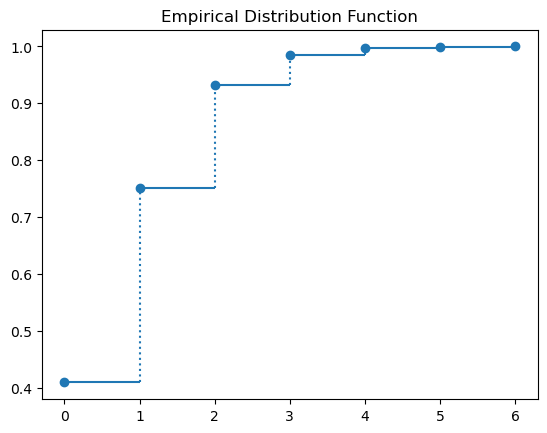

In [1]:
import numpy as np
X = np.random.poisson(1,size=1000)
from Utils import makeEDF, makeEMF, plotEDF
print(makeEDF(X))
plotEDF(makeEDF(X))

## Dvoretsky-Kiefer-Wolfowitz (DKW) Inequality

Let $X_1, X_2, \ldots, X_n \overset{IID}{\sim} F^* \in \{\text{all DFs}\}$

and the empirical distribution function (EDF) is $\widehat{F}_n(x) := \displaystyle\frac{1}{n} \sum_{i=1}^n \mathbf{1}_{[X_i,+\infty)}(x)$,

then, for any $\varepsilon > 0$,

$$P\left( \sup_x { | \widehat{F}_n(x) - F^*(x) | > \varepsilon  }\right) \leq 2 \exp(-2n\varepsilon^2) $$

We can use this inequality to get a $1-\alpha$ confidence band $C_n(x) := \left[\underline{C}_n(x), \overline{C}_n(x)\right]$ about our point estimate $\widehat{F}_n$ of our possibly unknown $F^*$ such that the $F^*$ is 'trapped' by the band with probability at least $1-\varepsilon$.

$$
\begin{aligned} 
    \underline{C}_{\, n}(x) &= \max \{ \widehat{F}_n(x)-\varepsilon_n, 0 \}, \notag \\ 
    \overline{C}_{\, n}(x) &= \min \{ \widehat{F}_n(x)+\varepsilon_n, 1 \}, \notag \\ 
    \varepsilon_n &= \sqrt{ \frac{1}{2n} \log \left( \frac{2}{\alpha}\right)} \\ 
\end{aligned}
$$

and

$$P\left(\underline{C}_n(x) \leq F^*(x) \leq \overline{C}_n(x)\right) \geq 1-\alpha$$

# Estimating the density

For a discrete random variable, estimating the density (pmf) is as simple as using the empirical pmf

[[0.00e+00 4.09e-01]
 [1.00e+00 3.42e-01]
 [2.00e+00 1.81e-01]
 [3.00e+00 5.30e-02]
 [4.00e+00 1.20e-02]
 [5.00e+00 2.00e-03]
 [6.00e+00 1.00e-03]]


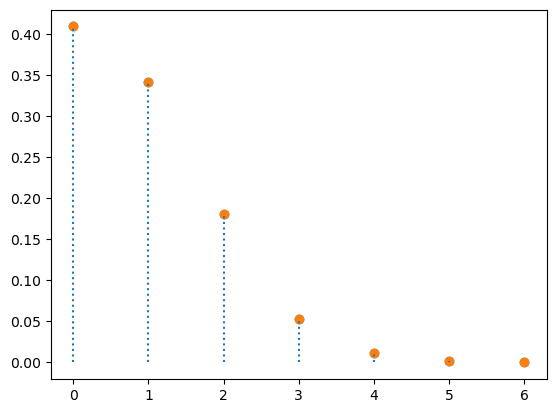

In [2]:
from Utils import plotEMF
print(makeEMF(X))
plotEMF(makeEMF(X))

## For a continuous random variable

For a continuous random variable we cannot really use the pmf, instead we consider something like a histogram

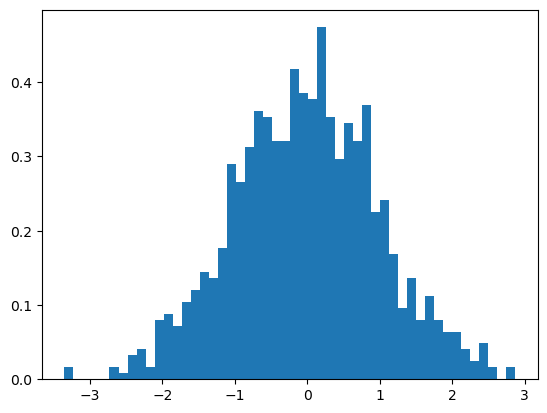

In [4]:
import matplotlib.pyplot as plt
Y = np.random.normal(size=1000)
freq,bins,_ = plt.hist(Y,density=True,bins=50)

In [5]:
print("     Bin \t Freq")
for frq,l_edge,r_edge in zip(freq,bins,bins[1:]):
    print("[%.2f,%.2f] \t %.2f" % (l_edge,r_edge,frq))

     Bin 	 Freq
[-3.35,-3.23] 	 0.02
[-3.23,-3.10] 	 0.00
[-3.10,-2.98] 	 0.00
[-2.98,-2.86] 	 0.00
[-2.86,-2.73] 	 0.00
[-2.73,-2.61] 	 0.02
[-2.61,-2.48] 	 0.01
[-2.48,-2.36] 	 0.03
[-2.36,-2.23] 	 0.04
[-2.23,-2.11] 	 0.02
[-2.11,-1.98] 	 0.08
[-1.98,-1.86] 	 0.09
[-1.86,-1.74] 	 0.07
[-1.74,-1.61] 	 0.10
[-1.61,-1.49] 	 0.12
[-1.49,-1.36] 	 0.14
[-1.36,-1.24] 	 0.14
[-1.24,-1.11] 	 0.18
[-1.11,-0.99] 	 0.29
[-0.99,-0.86] 	 0.27
[-0.86,-0.74] 	 0.31
[-0.74,-0.61] 	 0.36
[-0.61,-0.49] 	 0.35
[-0.49,-0.37] 	 0.32
[-0.37,-0.24] 	 0.32
[-0.24,-0.12] 	 0.42
[-0.12,0.01] 	 0.39
[0.01,0.13] 	 0.38
[0.13,0.26] 	 0.47
[0.26,0.38] 	 0.35
[0.38,0.51] 	 0.30
[0.51,0.63] 	 0.35
[0.63,0.75] 	 0.32
[0.75,0.88] 	 0.37
[0.88,1.00] 	 0.22
[1.00,1.13] 	 0.24
[1.13,1.25] 	 0.17
[1.25,1.38] 	 0.10
[1.38,1.50] 	 0.14
[1.50,1.63] 	 0.08
[1.63,1.75] 	 0.11
[1.75,1.87] 	 0.08
[1.87,2.00] 	 0.06
[2.00,2.12] 	 0.06
[2.12,2.25] 	 0.04
[2.25,2.37] 	 0.02
[2.37,2.50] 	 0.05
[2.50,2.62] 	 0.02
[2.62,2.75] 	 0.00


Whenever we want to use a histogram estimator, we need to decide how many bins we are going to need. This is a topic for another day.

# Regression example of risk minimization

Consider the following house price data

In [6]:
import csv
data = []
header = []
with open('data/portland.csv', mode='r') as f:
    reader = csv.reader(f)
    header = tuple(next(reader))
    for row in reader:
        try:
            data.append((int(row[0]),int(row[1]),int(row[2])))
        except e:
            print(e)

In [7]:
print(header)
print(data[:1])

('Size of the house (in square feet)', 'Number of bedrooms', 'Price of the house')
[(2104, 3, 399900)]


Lets think that the data generator $X$ is here the size of the house and the $Y$ is the price of the house.

In [8]:
import numpy as np
D = np.array(data)
X = D[:,0]
Y = D[:,2]

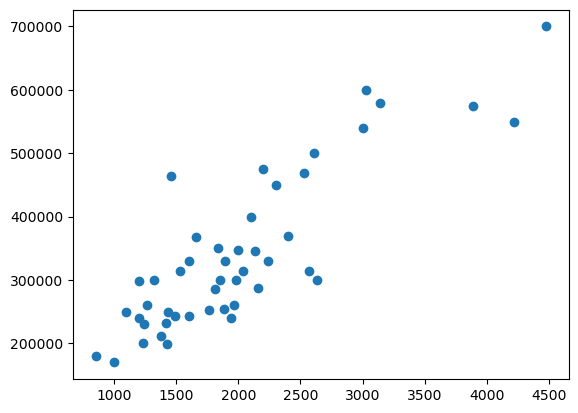

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

## Linear regression

An example of a learning machine is linear regression with quadratic loss. What we have is essentially

* The loss is the quadratic function
* We are searching among linear functions, $g_{k,m}(x) = kx+m$.

$$
    k^\ast, m^\ast = \text{argmin}_{k,m}\frac{1}{n} \sum_{i=1}^n (k X_i + m - Y_i)^2
$$

In [10]:
R = lambda a: np.mean(np.power((a[0]*X+a[1]-Y),2))

In [11]:
import scipy.optimize as so

We can use scipy to minimize the total loss $L$ above. 

In [12]:
result = so.minimize(R,(0,0),method = 'Nelder-Mead')
result

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4116265480.866082
             x: [ 1.345e+02  7.127e+04]
           nit: 174
          nfev: 330
 final_simplex: (array([[ 1.345e+02,  7.127e+04],
                       [ 1.345e+02,  7.127e+04],
                       [ 1.345e+02,  7.127e+04]]), array([ 4.116e+09,  4.116e+09,  4.116e+09]))

This gives us that the found $k \approx 135$ and the found $m \approx 70000$, we can also plot this together with data to see

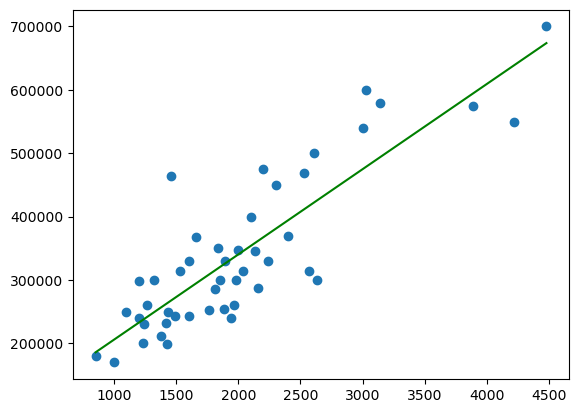

In [13]:
x_pred = np.linspace(np.min(X),np.max(X),2)
y_pred = x_pred*result['x'][0]+result['x'][1]
plt.scatter(X,Y)
plt.plot(x_pred,y_pred,color='green')